In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("Titanic-Dataset.csv", delimiter=',')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = df.drop(columns=['Cabin'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
np.sum(df['Age'].isna())

177

In [7]:
df.dropna(inplace = True)

In [8]:
port = df.groupby('Embarked').mean(numeric_only=True)

In [9]:
port

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,453.323077,0.607692,1.746154,30.814769,0.423077,0.415385,68.296767
Q,414.035714,0.285714,2.785714,28.089286,0.750000,0.392857,18.265775
S,449.225632,0.362816,2.328520,29.445397,0.523466,0.438628,27.476284


In [10]:
port[["Age", "Fare"]]

,Age,Fare
Embarked,,
C,30.814769,68.296767
Q,28.089286,18.265775
S,29.445397,27.476284


In [11]:
total = np.count_nonzero(df['PassengerId'])

In [12]:
survived = np.count_nonzero(df['Survived'])

In [13]:
percent_survived = round((survived/total)* 100, 2)

In [14]:
print("Total Number of Passengers =", total)
print("Total Number of Survived Passengers =", survived)
print("Survival Percentage =", percent_survived)

Total Number of Passengers = 712
Total Number of Survived Passengers = 288
Survival Percentage = 40.45


## Survival Rate

In [15]:
total_survived = df['Survived'].value_counts()

In [16]:
total_survived

Survived
0    424
1    288
Name: count, dtype: int64

In [17]:
total_passengers = df.shape[0]
total_passengers

712

In [18]:
survival_rate = (total_survived/total_passengers)*100
survival_rate

Survived
0    59.550562
1    40.449438
Name: count, dtype: float64

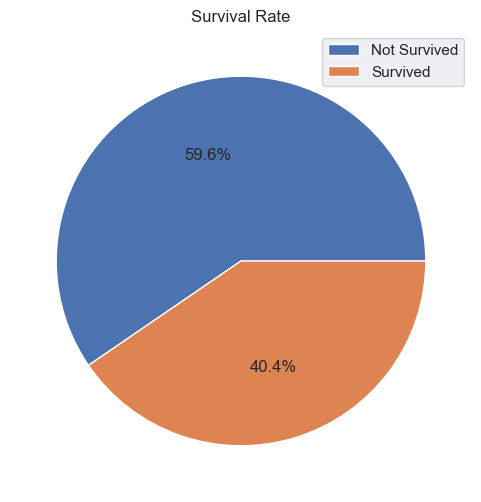

In [19]:
plt.figure(figsize = (11,6))
plt.pie(survival_rate, autopct = '%1.1f%%')
plt.legend(['Not Survived', 'Survived'])
plt.title("Survival Rate")
plt.show()

## Survival Rate by Gender

In [20]:
females = df[df['Sex'] == 'female']

In [21]:
females

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q


In [22]:
females_survived = np.count_nonzero(females['Survived'])

In [23]:
print("Total Number of Females Survived =", females_survived)

Total Number of Females Survived = 195


In [24]:
males = df[df['Sex'] == 'male']
males_survived = np.count_nonzero(males['Survived'])

In [25]:
print("Total Number of Males Survived =", males_survived)

Total Number of Males Survived = 93


In [26]:
survival_by_gender = df.groupby(['Sex', 'Survived']).size().unstack()
survival_by_gender

Survived,0,1
Sex,,
female,64,195
male,360,93


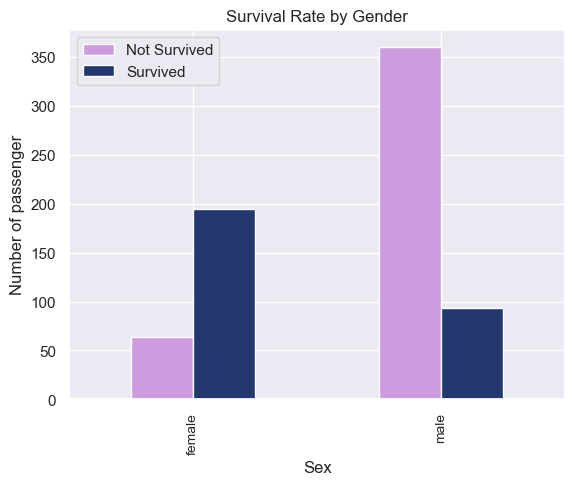

In [27]:
color = ["#cc9cdf", "#243870"]
survival_by_gender.plot(kind= 'bar', stacked= False, color = color)
plt.xlabel("Sex", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Number of passenger', fontsize=12)
plt.legend(['Not Survived', 'Survived'])
plt.title("Survival Rate by Gender")
plt.show()

## Survival Rate by Class

In [28]:
p_class = df.groupby(['Pclass', 'Survived']).size().unstack()

In [29]:
p_class

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


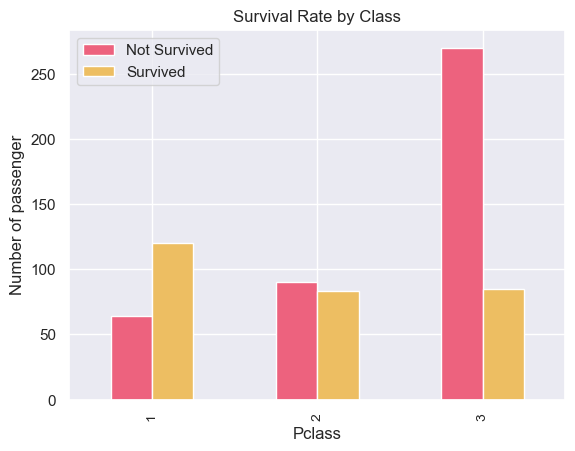

In [30]:
color = ["#ed627e", "#edbe62"]
p_class.plot(kind= 'bar', color = color)
plt.xlabel("Pclass", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Number of passenger', fontsize=12)
plt.legend(['Not Survived', 'Survived'])
plt.title("Survival Rate by Class")
plt.show()

## Survival Rate by Age

In [31]:
df['Age'] = df['Age'].astype(int)

In [32]:
age_bins = [0,18,30,50,100]
age_labels = ['0-17', '18-29', '30-49', '50+' ]

df['Age_group'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)

In [33]:
survival_age_group = df.groupby(['Age_group', 'Survived']).size().unstack()
survival_age_group

C:\Users\ACER\AppData\Local\Temp\ipykernel_8584\1516087158.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_group = df.groupby(['Age_group', 'Survived']).size().unstack()


Survived,0,1
Age_group,,
0-17,69,63
18-29,176,96
30-49,137,101
50+,42,21


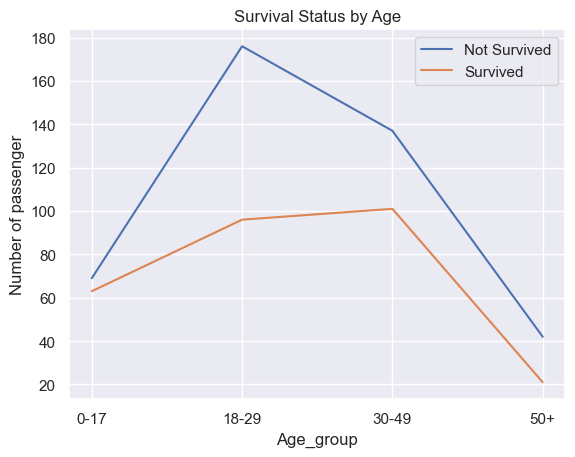

In [34]:
plt.plot(survival_age_group)
plt.title("Survival Status by Age")
plt.xlabel("Age_group")
plt.ylabel('Number of passenger')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Observations:

#### Total Number of Passengers = 712
#### Total Number of Survived Passengers = 288
#### Survival Rate is 40%
#### From Survival Rate by Gender we can see that the survival rate of Female is much higher than that of males
#### From Survival Rate by Class we can say that the passengers travelling by 1st class are more likely to survive whereas most of the passesngers travelling by 3rd class *do not survive*
#### After the plotting the Survival Rate by Age graph we can conclude that the survival rate of people travelling between age between 18-40 is more, hence we can say more the age less chances to survive.